In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqldf

In [14]:
e_learning_data = pd.read_csv('e_learning_data.csv')

In [15]:
e_learning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10484 entries, 0 to 10483
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            10484 non-null  object 
 1   user_status        10484 non-null  object 
 2   content_title      10484 non-null  object 
 3   language_code      10484 non-null  object 
 4   completion_status  10484 non-null  object 
 5   high_score         10484 non-null  float64
 6   gender             10484 non-null  object 
 7   employment_type    10484 non-null  object 
 8   staff_band_level   10484 non-null  object 
 9   country            10484 non-null  object 
 10  function           10484 non-null  object 
 11  department         10484 non-null  object 
dtypes: float64(1), object(11)
memory usage: 983.0+ KB


In [16]:
e_learning_data.shape

(10484, 12)

In [17]:
e_learning_data.head()

,user_id,user_status,content_title,language_code,completion_status,high_score,gender,employment_type,staff_band_level,country,function,department
0,USER001,Active,"Six Sigma: Team Basics, Roles, and Responsibil...",English,Completed,85.0,F,Contract,Contract,Nigeria,Information Technology,IT
1,USER001,Active,Agile Principles and Methodologies,English,Completed,92.0,F,Contract,Contract,Nigeria,Information Technology,IT
2,USER001,Active,Ethics and Project Management,English,Completed,85.0,F,Contract,Contract,Nigeria,Information Technology,IT
3,USER001,Active,Overcoming Unconscious Bias in the Workplace,English,Completed,87.0,F,Contract,Contract,Nigeria,Information Technology,IT
4,USER001,Active,Forming New Habits,English,Completed,0.0,F,Contract,Contract,Nigeria,Information Technology,IT


## Insights and Visualization

## 1) What are the different countries that participated in the program
## 2) What is the proportion of gender participation 
## 3) What language does learners identify with
## 4) What percentage of learners completed their program
## 5) What is the completion rate per gender
## 6) What is the employment type of learners
## 7) Which country has a high completion rate
## 8) Who are the top successfull learners
## 9) Gender participation per country
## 10) What are the job function learners identified with

In [18]:
# e_learning_data.function.value_counts()

### Top Participating Countries

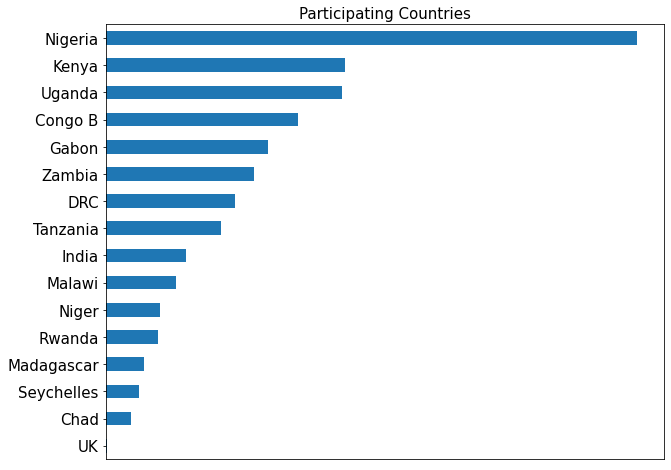

In [19]:
plt.figure(figsize=(10,8))
e_learning_data['country'].value_counts().plot(kind='barh', fontsize=15).invert_yaxis()
plt.title('Participating Countries', fontsize=15)
plt.xticks([])
plt.show()

## proportion of gender participation

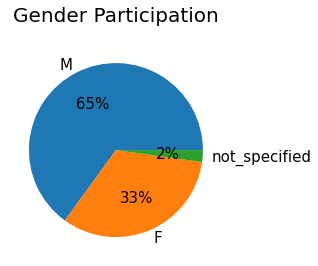

In [20]:
e_learning_data.gender.value_counts().plot(kind='pie',ylabel='', fontsize=15, autopct='%1.0f%%')
plt.title('Gender Participation', fontsize=20,pad=20)

plt.show()

## language learners identify with

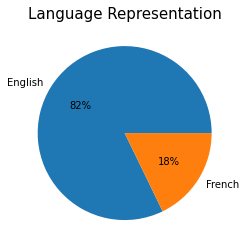

In [50]:
e_learning_data.language_code.value_counts().plot(kind='pie', ylabel='', autopct='%1.0f%%')
plt.title('Language Representation', fontsize=15)
plt.show()

## percentage of learners who completed their program

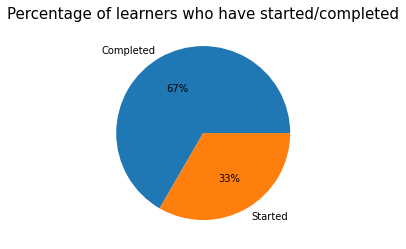

In [22]:
e_learning_data.completion_status.value_counts().plot(kind='pie', ylabel='', autopct='%1.0f%%')
plt.title('Percentage of learners who have started/completed', fontsize=15)
plt.show()

## Completion rate per gender

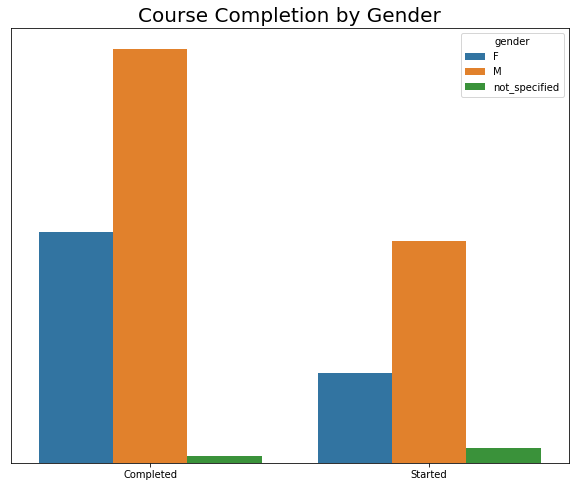

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(x='completion_status', hue='gender', data=e_learning_data)
plt.title('Course Completion by Gender', fontsize=20)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.show()

## employment type of learners

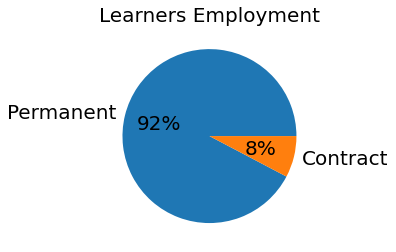

In [24]:
e_learning_data.employment_type.value_counts().plot(kind='pie', ylabel='', fontsize=20, autopct='%1.0f%%')
plt.title('Learners Employment', fontsize=20)
plt.show()

In [25]:
e_learning_data.groupby('employment_type')['employment_type'].count()

employment_type
Contract      808
Permanent    9676
Name: employment_type, dtype: int64

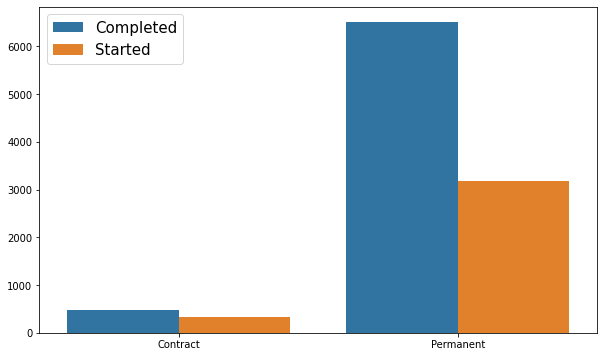

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='employment_type', hue='completion_status', data=e_learning_data)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper left', fontsize=15)
plt.show()

## Which country has a high completion rate

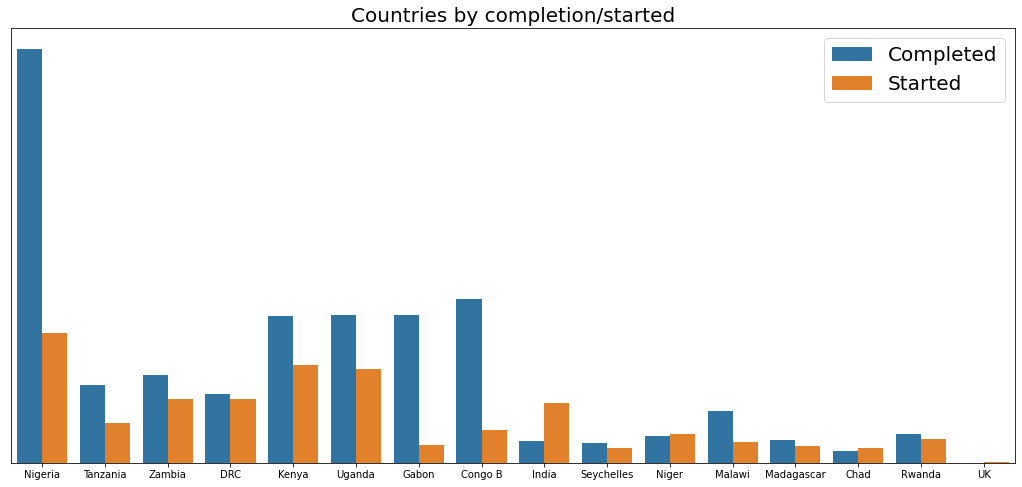

In [45]:
plt.figure(figsize=(18,8))
sns.countplot(data=e_learning_data, x='country', hue='completion_status')
plt.title('Countries by completion/started', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.legend(fontsize=20)
plt.show()

## Top successful learners

In [28]:
e_learning_data[e_learning_data.completion_status == 'Completed'].groupby(['user_id', 'country', 'function']).count().sort_values(by='completion_status', ascending=False)['completion_status'][:10].reset_index()

,user_id,country,function,completion_status
0,USER00218,Gabon,Finance,87
1,USER00504,Gabon,Finance,87
2,USER00623,Gabon,Finance,87
3,USER001671,Gabon,Finance,87
4,USER00885,Gabon,Finance,85
5,USER00122,Tanzania,Networks,71
6,USER00297,Malawi,Legal and Regulatory Affairs,65
7,USER00408,Uganda,Customer Experience,64
8,USER00414,Kenya,not_specified,62
9,USER00488,Gabon,Finance,60


In [29]:
query = """select user_id, country, function, count(completion_status) as completed_courses from e_learning_data 
            where completion_status = 'Completed' group by user_id, country order by completed_courses desc limit 10
"""

In [30]:
sqldf.run(query)

,user_id,country,function,completed_courses
0,USER001671,Gabon,Finance,87
1,USER00218,Gabon,Finance,87
2,USER00504,Gabon,Finance,87
3,USER00623,Gabon,Finance,87
4,USER00885,Gabon,Finance,85
5,USER00122,Tanzania,Networks,71
6,USER00297,Malawi,Legal and Regulatory Affairs,65
7,USER00408,Uganda,Customer Experience,64
8,USER00414,Kenya,not_specified,62
9,USER00488,Gabon,Finance,60


## Gender participation per country

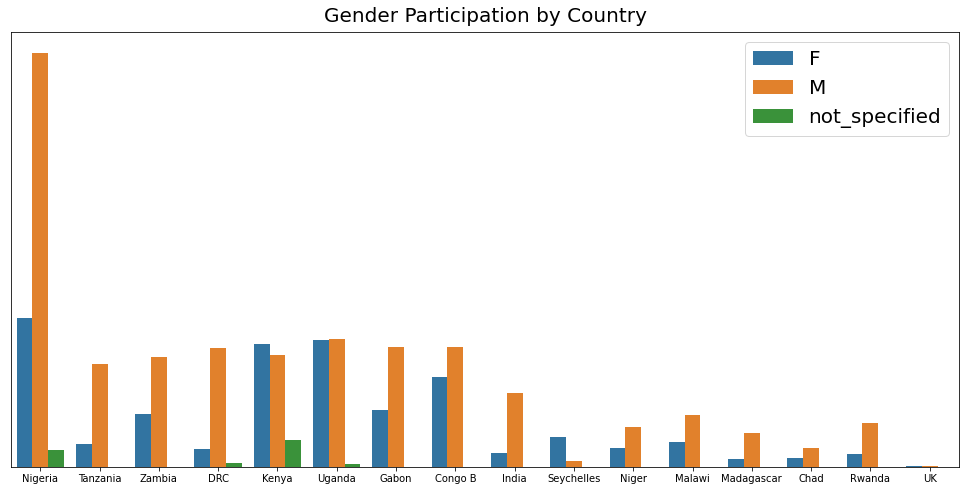

In [41]:
plt.figure(figsize=(17,8))

sns.countplot(x='country', data=e_learning_data, hue='gender')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc='upper right', fontsize=20)
plt.title('Gender Participation by Country', fontsize=20, pad=10)


plt.show()

## Job function learners identified with

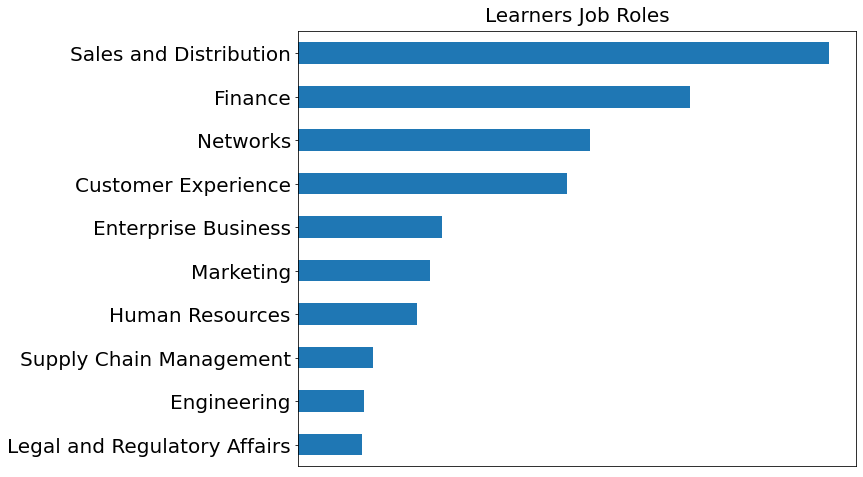

In [39]:
plt.figure(figsize=(10,8))

e_learning_data.function.value_counts()[:10].plot(kind='barh', fontsize=20).invert_yaxis()
plt.xticks([])
plt.title('Learners Job Roles', fontsize=20, pad=10)
plt.show()